# Homework4: Instructions
## Team Member 
### Hammam Abdelwahab 
### Najlae Lemrabet
### Hatim Jamali


1) Write down 3 questions and their brief answers on the reading material. [2 Points]

1- Name three different Type of support vector machine ?
* polynomial learning machine.
* Radial-basis function network.
* Two-layer perception.


2-  what are the two conditions to optimize Lagrangian function $ J(w,b,\alpha)=\frac{1}{2} w^T w-\sum_{n=1}^{N} \alpha_{i}[d_{i}(w^T x_{i}+ b)- 1] \\ 
 \alpha_{i} \text{ : Lagrange multipliers?}$

  condition 1: $$ \frac{\partial J(w,b,\alpha )}{\partial w} = 0 $$
  
  condition 2: $$ \frac{\partial J(w,b,\alpha )}{\partial b} = 0 $$
  
3- what is the Loss function for SVM? 

$$  L_{\epsilon}(d,y) =
\begin{cases}
       |d-y|-\epsilon \quad\text{for}\, |d-y| \ge \epsilon \\
        0, \text{otherwise.} \\ 
     \end{cases}\\  $$
    $$ \text{where } \epsilon \text{ is a prescribed parameter}\\
    d : \text{desired response}\\
    \text{error:} d-y $$

2) SVM 1-D Understanding  

The graphs below represent three different one-dimensional classification (dichotomization) tasks (along a sketched x-axis, dash means 'no data point').

What is the lowest-order polynomial decision function that can correctly classify the given data? Black dots denote class 1 with target function value y1 = +1 and white dots depict class 2 with targets y2 = -1. What are the decision boundaries?
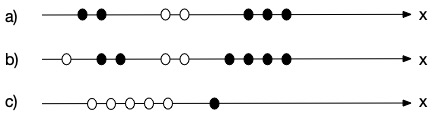 [8 points]


 FOR CASE: a
 for degree n =  1  error in prediction=  2
 for degree n =  2  error in prediction=  0
--------
Minimum polynomial degree for case a =  2
--------


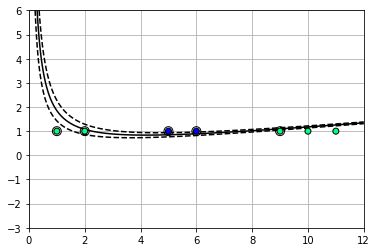


 FOR CASE: b
 for degree n =  1  error in prediction=  4
 for degree n =  2  error in prediction=  3
 for degree n =  3  error in prediction=  1
 for degree n =  4  error in prediction=  0
--------
Minimum polynomial degree for case b =  4
--------


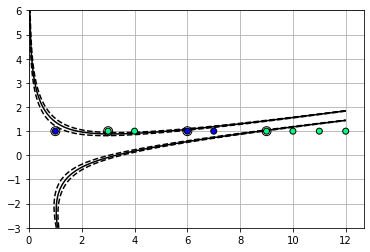


 FOR CASE: c
 for degree n =  1  error in prediction=  0


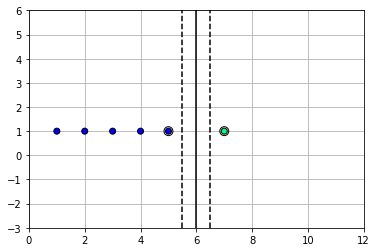

--------
Minimum polynomial degree for case c =  1
--------


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
%matplotlib inline

#The idea is to apply svm using polynomial kernel. The code classifies the data on increasing
#order of degrees 

def svc(n):
    svclassifier = SVC(kernel='poly',degree=n,gamma="auto")
    svclassifier.fit(X, y)
    y_pred = svclassifier.predict(X)
    error_rate = sum(y_pred != y)
    #now plotting 
    if(error_rate == 0):
        
        plt.scatter(svclassifier.support_vectors_[:, 0], svclassifier.support_vectors_[:, 1], s=80,
                    facecolors='none', zorder=10, edgecolors='k')
        plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap='winter',
                    edgecolors='k')
        x_min = 0
        x_max = 12
        y_min = -3
        y_max = 6

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = svclassifier.decision_function(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5])
        
    return error_rate



## dataPoints
X = np.array([[1,1],[2,1],[5,1],[6,1],[9,1],[10,1],[11,1]])
## Labels
y = np.array([1,1,-1,-1,1,1,1])

print(" FOR CASE: a")
error = 1
n=1
while(error != 0):
    error = svc(n)
    print(" for degree n = ",n," error in prediction= ",error)
    n = n + 1
print("--------")  
print("Minimum polynomial degree for case a = ",n-1)
print("--------")  
plt.grid()
plt.show()


#----

print("\n FOR CASE: b")
## dataPoints
X = np.array([[1,1],[3,1],[4,1],[6,1],[7,1],[9,1],[10,1],[11,1],[12,1]])
## Labels
y = np.array([-1,1,1,-1,-1,1,1,1,1])


error = 1
n=1
while(error != 0):
    error = svc(n)
    print(" for degree n = ",n," error in prediction= ",error)
    n = n + 1

print("--------")   
print("Minimum polynomial degree for case b = ",n-1)
print("--------")  
plt.grid()
plt.show()
#----
print("\n FOR CASE: c")
## dataPoints
X = np.array([[1,1],[2,1],[3,1],[4,1],[5,1],[7,1]])
## Labels
y = np.array([-1,-1,-1,-1,-1,1])


error = 1
n=1
while(error != 0):
    error = svc(n)
    print(" for degree n = ",n," error in prediction= ",error)
    n = n + 1
plt.grid()
plt.show()
print("--------")     
print("Minimum polynomial degree for case c = ",n-1)
print("--------")  

3) In Haykin 2ed, P6.14 shows a set of data points corresponding to two classes C1 and C2. Both coordinates x1 and x2 range from -1 to +1. Using the radial-basis function kernel  

K(x,t) = exp(-(|| x - t ||^2))  
construct the optimal hyperplane for the following data set. 

mypositive=[
-1/2 3/4+1/16
-1/2 3/4-1/16 
-3/8 3/4+1/16
-3/8 3/4-1/16
-1/4 3/4+1/16 
-1/4 3/4-1/16
-1/8 1/2+1/16
-1/8 3/4
0 1/2
0 3/4
1/8 -3/4-3/16
1/8 -3/4
1/8 -1/2-1/16
1/8 -1/2+1/16
1/8 1/4 
1/8 1/4+3/16
1/8 1/2+2/16
1/4 -3/4-2/16
1/4 -1/2-2/16
1/4 -1/16
1/4 2/16
1/4 1/4+1/16
1/4 1/2
3/8 -1/4-2/16
3/8 -3/16
3/8 1/16
3/8 1/4
1/2 -1/16
];  

mynegative=[ -1/2 1/2
-3/8 -1/2
-3/8 1/4+1/16
-3/8 1/2
-1/4 -3/4-1/16
-1/4 -3/4+1/16
-1/4 -3/16
-1/4 2/16
-1/4 1/4+1/16
-1/4 1/2-1/16
-1/8 -3/4-2/16
-1/8 -3/4
-1/8 -1/2-1/16
-1/8 -1/4-2/16
-1/8 -1/4
-1/8 3/16
-1/8 1/4+1/16
0 -1/4
0 1/16
1/16 -1/16
];

You result classification should looks as the following:
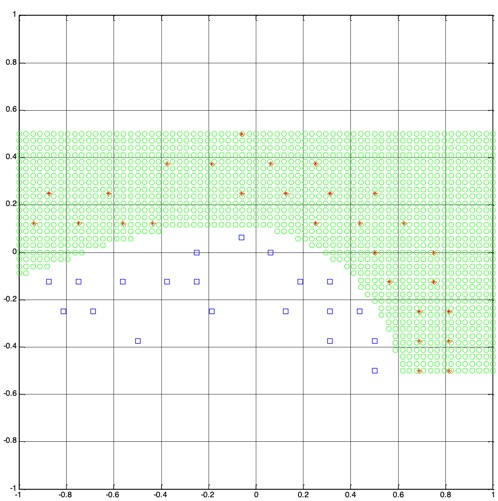

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


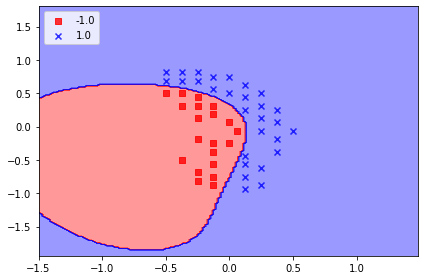

In [2]:
from matplotlib.colors import ListedColormap


mypositive=[[-1/2 ,3/4+1/16],
                     [-1/2 ,3/4-1/16],
                     [-3/8 ,3/4+1/16],
                     [-3/8 ,3/4-1/16],
                     [-1/4 ,3/4+1/16],
                     [-1/4 ,3/4-1/16],
                     [-1/8 ,1/2+1/16],
                     [-1/8 ,3/4] ,
                     [0 ,1/2] ,
                     [0 ,3/4] ,
                     [1/8 ,-3/4-3/16],
                     [1/8 ,-3/4],
                     [1/8 ,-1/2-1/16],
                     [1/8 ,-1/2+1/16], 
                     [1/8 ,1/4],
                     [1/8 ,1/4+3/16],
                     [1/8 ,1/2+2/16],
                     [1/4 ,-3/4-2/16],
                     [1/4 ,-1/2-2/16],
                     [1/4 ,-1/16],
                     [1/4 ,2/16],
                     [1/4 ,1/4+1/16],
                     [1/4 ,1/2],
                     [3/8 ,-1/4-2/16],
                     [3/8 ,-3/16],
                     [3/8 ,1/16],
                     [3/8 ,1/4],
                     [1/2 ,-1/16]]

nb_el_pos = np.shape(mypositive)[0]
mynegative=[[-1/2 ,1/2] ,
                     [-3/8 ,-1/2] ,
                     [-3/8 ,1/4+1/16] ,
                     [-3/8 ,1/2 ],
                     [-1/4 ,-3/4-1/16] ,
                     [-1/4 ,-3/4+1/16] ,
                     [-1/4 ,-3/16] ,
                     [-1/4 ,2/16] ,
                     [-1/4 ,1/4+1/16] ,
                     [-1/4 ,1/2-1/16] ,
                     [-1/8 ,-3/4-2/16] ,
                     [-1/8 ,-3/4] ,
                     [-1/8 ,-1/2-1/16] ,
                     [-1/8 ,-1/4-2/16] ,
                     [-1/8 ,-1/4] ,
                     [-1/8 ,3/16] ,
                     [-1/8 ,1/4+1/16] ,
                     [0 ,-1/4] ,
                     [0 ,1/16] ,
                     [1/16 ,-1/16] ]



nb_el_neg = np.shape(mynegative)[0]
for neg in mynegative:
    mypositive.append(neg)
    
X = mypositive
np.shape(X)
labelsPositive = np.ones(nb_el_pos)
labelsNegative = -np.ones(nb_el_neg)
Y = np.hstack((labelsPositive,labelsNegative))
svclassifier = SVC(kernel='rbf',gamma=np.sqrt(1/2))
svclassifier.fit(X, Y)
y_pred = svclassifier.predict(X)
error_rate = sum(y_pred != Y)



def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    X = np.array(X)
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'white')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=1/np.sqrt(2), C=10)
# Train the classifier
svm.fit(X, Y)

# Visualize the decision boundaries
plot_decision_regions(X, Y, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()   

### Explain: 

In the code above, the radial-basis function kernel is used to find the optimal hyperplane as shown in the figure above. please note that the parameters for gamma and c are chosen in intention for optimal classification goal. Tuning of these parameters can be done automatically using other approaches such as cross validation or VC-dimension. 